In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import torch
from torch import nn
from torch import optim
import os

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def carregar_dadosv2(train_data, test_data, test_size=0.2, random_state=42):
    # Load data from CSV file
    train_data = pd.read_csv(train_data)
    val_data = pd.read_csv(test_data)

    # Split data into features (X) and targets (y)
    X = train_data.drop(['hysteresis', 'joule'], axis=1)
    y = train_data[['hysteresis', 'joule']]

    # Perform train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

    X_test = val_data.drop(['hysteresis', 'joule'], axis=1)
    y_test = val_data[['hysteresis', 'joule']]

    # Convert data to numpy arrays
    X_train_np = X_train.to_numpy()
    y_train_np = y_train.to_numpy()
    X_val_np = X_val.to_numpy()
    y_val_np = y_val.to_numpy()
    X_test_np = X_test.to_numpy()
    y_test_np = y_test.to_numpy()

    return X_train_np, y_train_np, X_val_np, y_val_np, X_test_np, y_test_np

In [ ]:
import matplotlib.pyplot as plt


def plot_comparacao(y_true, y_pred):

    plt.figure(figsize=(8, 6))

    # Plot each target separately
    for i in range(2):  # Assuming two targets
        plt.scatter([true[i] for true in y_true], [pred[i] for pred in y_pred], label=f'Target {i+1}', alpha=0.5)

    max_val = max(max(y_true[:,0]), max(y_pred[:,0]), max(y_true[:,1]), max(y_pred[:,1]))
    plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', linewidth=2, label='Reference Line')

    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.title('Comparison between True and Predicted Values')
    plt.legend()

    plt.show()


In [ ]:
!pip install pytorch-tabnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyli

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import train_test_split
import numpy as np

folder_path = '/content/drive/MyDrive/FederatedLearning-main/Data/IPMSM_datasets/dataset_for_iron_losses_of_IPMSMs/2D'
os.chdir(folder_path)

X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor,X_test_tensor,y_test_tensor = carregar_dadosv2('dados_de_treino.csv','dados_de_teste.csv')
input_size = X_train_tensor.shape[1]
print(input_size)
output_size = y_train_tensor.shape[1]
print(output_size)


14
2


In [ ]:
clf = TabNetRegressor()

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [ ]:
clf.fit(
    X_train=X_train_tensor,
    y_train=y_train_tensor,
    eval_set=[(X_val_tensor, y_val_tensor)],
    eval_name=["val"],
    max_epochs=1,
    patience=50
)


epoch 0  | loss: 0.57253 | val_mse: 0.24698 |  0:00:02s
Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_mse = 0.24698


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
values = clf.predict(X_test_tensor)
print(values)
type(values)

[[ 1.2855401   2.044458  ]
 [ 0.08219409  0.63449574]
 [ 1.4961034   2.1157432 ]
 ...
 [-0.04482397  0.80070287]
 [-0.69649816 -0.587049  ]
 [-0.20279045  0.5725206 ]]


numpy.ndarray

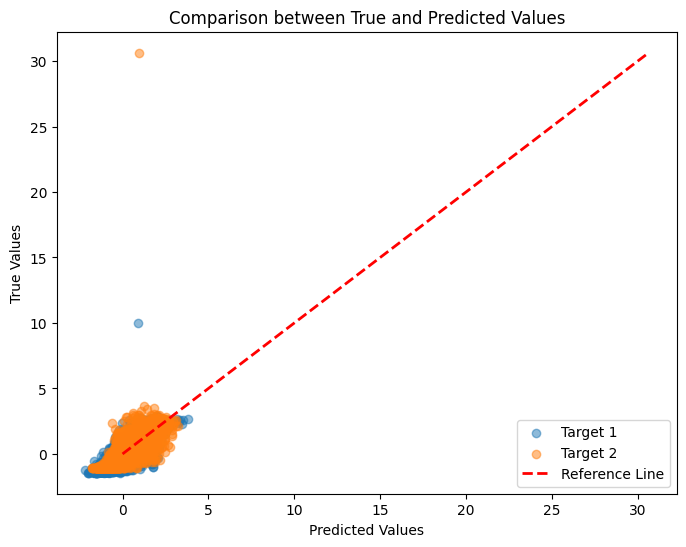

In [ ]:
plot_comparacao(values,y_test_tensor)

In [ ]:
clf.save_model("/content/drive/MyDrive/FederatedLearning-main/Data/IPMSM_datasets/dataset_for_iron_losses_of_IPMSMs/TabNet 2D saved model")

Successfully saved model at /content/drive/MyDrive/FederatedLearning-main/Data/IPMSM_datasets/dataset_for_iron_losses_of_IPMSMs/TabNet 2D saved model.zip


'/content/drive/MyDrive/FederatedLearning-main/Data/IPMSM_datasets/dataset_for_iron_losses_of_IPMSMs/TabNet 2D saved model.zip'

In [ ]:
nabla_model = TabNetRegressor()
nabla_model.load_model("/content/drive/MyDrive/FederatedLearning-main/Data/IPMSM_datasets/dataset_for_iron_losses_of_IPMSMs/TabNet 2D saved model.zip")

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [ ]:
folder_path = '/content/drive/MyDrive/FederatedLearning-main/Data/IPMSM_datasets/dataset_for_iron_losses_of_IPMSMs/Nabla'
os.chdir(folder_path)

X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor,X_test_tensor,y_test_tensor = carregar_dadosv2('dados_de_treino.csv','dados_de_teste.csv')
input_size = X_train_tensor.shape[1]
print(input_size)
output_size = y_train_tensor.shape[1]
print(output_size)


11
2


In [ ]:
values = nabla_model.predict(X_test_tensor)
print(values)
type(values)

RuntimeError: running_mean should contain 11 elements not 14

In [ ]:
plot_comparacao(values,y_test_tensor)